In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from sklearn.preprocessing import MinMaxScaler
import scipy.io as sio
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
import scipy.io as sio
import datetime
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from scipy.stats import iqr
from scipy.stats import wilcoxon, spearmanr
from statsmodels.stats.descriptivestats import sign_test
import calendar

NameError: name 'df_adh' is not defined

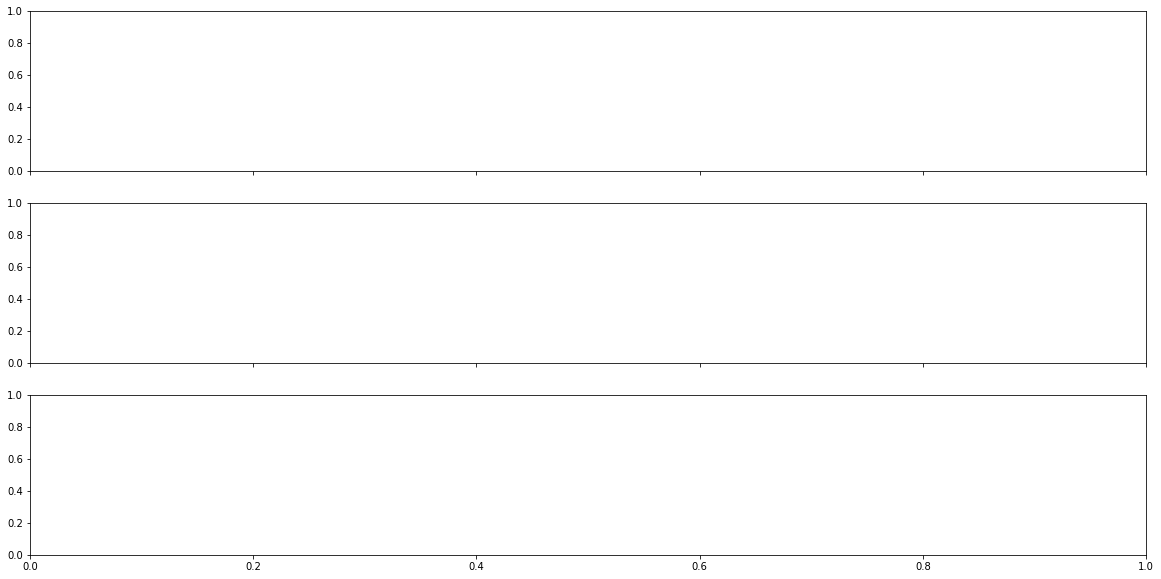

In [2]:
fig, axs = plt.subplots(3, figsize=[20, 10], sharex=True)
df_adh.plot.bar(x='uid', y='meal_adh', rot=45, fontsize=20, figsize=[20, 10], legend=False, color='orange', ax=axs[0])
df_adh.plot.bar(x='uid', y='cgm_adh', rot=45, fontsize=20, figsize=[20, 10], legend=False, color='blue', ax=axs[1])
df_adh.plot.bar(x='uid', y='acti_adh', rot=45, fontsize=20, figsize=[20, 10], legend=False, color='green', ax=axs[2])

# plt.savefig('/Users/amrutapai/Documents/SDRIpaper1/adherence'+'.svg', format='svg')


In [26]:
fig = go.Figure(layout = go.Layout(
            plot_bgcolor="#FFF",  # Sets background color to white
            xaxis=dict(
                linecolor="black",  # Sets color of X-axis line
                showgrid=False  # Removes X-axis grid lines
            ),
            yaxis=dict(
                title="Number of days",  
                linecolor="black",  # Sets color of Y-axis line
                showgrid=False,  # Removes Y-axis grid lines    
            ),
            font=dict(
                family="Arial",
                size=24,
                color="black"
            )
        ))
fig.update_yaxes(range=[0, 20])
# fig.add_trace(go.Box(y=[50,50], boxpoints='all', text= descript[np.where(str_name == ty)[0]], boxmean=False, name=0))

fig.add_trace(go.Box(y=df_adh['meal_adh'].values,boxpoints='all', name='MyFitnessPal'))
fig.add_trace(go.Box(y=df_adh['cgm_adh'].values,boxpoints='all', name='CGM'))
fig.add_trace(go.Box(y=df_adh['acti_adh'].values,boxpoints='all', name='Actigraph'))
fig.write_image("/Users/amrutapai/Documents/SDRIpaper1/adh.svg")

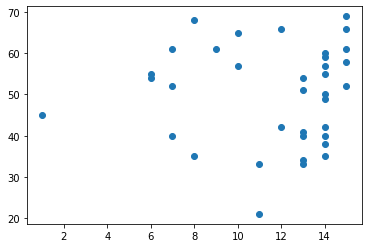

In [11]:
plt.scatter(df_adh['acti_adh'].values, age)

In [4]:
df_adh['acti_adh'].describe()

count    36.000000
mean      9.972222
std       4.102167
min       1.000000
25%       6.750000
50%      11.000000
75%      14.000000
max      15.000000
Name: acti_adh, dtype: float64

In [21]:
df_adh['acti_adh']

0     13
1     13
2     14
3     14
4     14
5     14
6     13
7     13
8      9
9     14
10    14
11    13
12    13
13    13
14     8
15     5
16    14
17     7
18    13
19    14
20    14
21     2
22    10
23     1
24    12
25    12
26    13
27     9
28     9
29     6
30     8
31     7
32    11
33    13
34     6
35     7
Name: acti_adh, dtype: int64

In [19]:
df_adh['cgm_adh'].describe()

count    36.000000
mean     12.583333
std       1.295597
min       7.000000
25%      13.000000
50%      13.000000
75%      13.000000
max      13.000000
Name: cgm_adh, dtype: float64

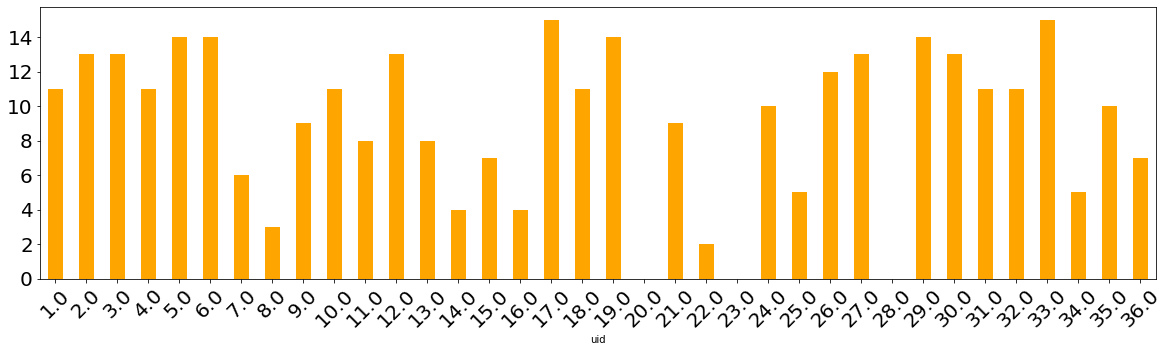

In [49]:
ax = df_adh.plot.bar(x='uid', y='adherence atleast 3 meal', rot=45, fontsize=20, figsize=[20, 5], legend=False, color='orange')

In [23]:
df_adh.to_csv('/Users/amrutapai/Desktop/adherence_steve.csv')

In [24]:
 df_food['label'] 

0     breakfast
1        dinner
2        snacks
3     breakfast
4         lunch
        ...    
67       dinner
68       dinner
69       dinner
70       dinner
71       snacks
Name: label, Length: 72, dtype: object

In [40]:
main_folder = '/Users/amrutapai/Library/CloudStorage/Box-Box/SDRI Datasets/SDRI-Rice Digital-Health-Study/'
a1c = np.array([7.7, 6, 6.3, 6.4, 6.3, 5.6, 8.9, 12.3, 5.2, 5.4, 8.4, 5.9, 5.5, 5.3, 6.5, 6.6,
                5.4, 5.9, 10.9, 5.6, 5, 12.4, 7.8, 6.5, 5.7, 5.9, 6.7, 6.1, 5.3, 7, 5.5, 5.4, 10.4, 6.9, 5.6, 5.5])
age = np.array([59,58,57,66,52,69,55,33,66,51,61,50,40,34,68,57,38,35,54,35,40,52,65,45,42,42,60,61,21,54,33,61,49,41,55,40])


med = np.zeros(36)
med[[0, 3, 6, 7, 10, 14, 15, 18, 21, 29]] = 1

df_adh = pd.DataFrame()

time_diff = []
# %matplotlib qt
for i, pc in enumerate(np.arange(1, 37,1)):
    #     np.arange(1, 37,1)):
    #                        2,  3, 5,  6, 8, 10, 11, 12, 13, 17, 18,  21, 27, 29,  31, 32, 33, 35, 36]):


    print(pc)
    
    if len(str(pc)) == 1:
        nm = '00'+ str(pc)
    else:
        nm = '0'+ str(pc)

    pct_name = 'digh01'+ nm 
    
    meal_adh = 0
    acti_adh = 0
    cgm_adh = 0
    



    for filename in os.listdir(os.path.join(main_folder, pct_name)):

        if filename.startswith("CGM"):
            cgm_filename = filename
    
    
    df = pd.read_csv(os.path.join(main_folder,pct_name,cgm_filename), skiprows=[0,1]) 
    df_cgm = pd.DataFrame(columns=['datetime','glucose'])
    df_cgm['datetime'] = [datetime.datetime.strptime(df['Device Timestamp'].values[i], 
                                                 '%m/%d/%Y %H:%M') 
                      for i in range(len(df['Device Timestamp'].values))]

    df_cgm['glucose'] = df['Historic Glucose mg/dL']
    df_cgm ['datetime'] = df_cgm ['datetime']
    df_day = df_cgm ['datetime'].dt.date


    for filename in os.listdir(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:])):
        if "AGD Details Epochs" in filename:
            acti_filename = filename

    df = pd.read_csv(os.path.join(main_folder, pct_name, 'Actigraph_DigH01-'+pct_name[-3:], acti_filename), skiprows=[0]) 
    df_acti_min = pd.DataFrame(columns=['datetime','kcals out','stepcount', 'hour'])
    df_acti_min['datetime'] = [ datetime.datetime.strptime(
    df['date'][j]+' '+df['epoch'][j], '%m/%d/%Y %I:%M:%S %p') for j in range(len(df))]
    df_acti_min['kcals out'] = df['kcals']                                                   
    df_acti_min['stepcount'] = df['steps']
    df_acti_min['hrs'] =  df_acti_min['datetime'].dt.hour
    df_day_acti = df_acti_min['datetime'].dt.date
    
    
    for dt in np.unique(df_day_acti):
        stps = np.where((df_day_acti==dt)& (df_acti_min['datetime'].dt.hour >= 4))[0]
        
        if len(stps) >= 10*60:
            
            acti_adh = acti_adh+1
            
#         if len(np.where(df_acti['stepcount'][stps].values == 0)[0]) > 0:
#             print(df_acti['stepcount'][stps].values)
            
            
    for dt in np.unique(df_day):
        stps = np.where((df_day==dt))[0]

        if len(stps) >= 96:

            cgm_adh = cgm_adh+1
        

    if pc not in [4, 7, 9]:

        if len(str(pc)) == 1:
            nm = '00' + str(pc)
        else:
            nm = '0' + str(pc)

        pct_id = 'digh01' + nm


        df = pd.read_csv(os.path.join(main_folder, pct_id, 'MFP-digh01' + pct_id[-3:] + '.csv'))
        df.loc[df['Time'].values == 'No Time', 'Time'] = np.nan
        df = df.dropna().reset_index()

        df_food = pd.DataFrame(columns=['datetime', 'kcals in', 'carb', 'sugar', 'label', 'protein', 'fat', 'name'])
        df_food['datetime'] = [datetime.datetime.strptime(
            [df['Date'][i] + ' ' + df['Time'][i] for i in range(len(df))][j], '%m/%d/%y %I:%M %p')
            for j in range(len(df))]

        df_food['kcals in'] = df['Calories kcal']
        df_food['carb'] = df['Carbs g']
        df_food['protein'] = df['Protein g']
        df_food['fat'] = df['Fat g']
        df_food['sugar'] = df['Sugar g']
        df_food['label'] = df['Label']
        df_food['datetime'] = df_food['datetime']
        df_food['name'] = df['Food name']
       
        food_dt = df_food['datetime'].dt.date
        
        food_dt_2 = 0
        food_dt_3 = 0
        
        for dt in np.unique(food_dt.values):
            
            if len( np.unique(df_food.loc[np.where(food_dt == dt)[0], 'label'])) >=2 :
                
                    food_dt_2 = food_dt_2+1
                    
            if len( np.unique(df_food.loc[np.where(food_dt == dt)[0], 'label'])) >=3 :
                
                    food_dt_3 = food_dt_3+1
            
        
        
        
        n_days = len(np.unique(food_dt.values))
        n_days_2 = food_dt_2
        n_days_3 = food_dt_3
        
#         if n_days > 1:
            
#             n_days = 1
            
#         if n_days_2 > 1:
            
#             n_days_2 = 1
        
        
        
        
    else:
        
        if len(str(pc)) == 1:
            nm = '00' + str(pc)
        else:
            nm = '0' + str(pc)

        pct_id = 'digh01' + nm


        df = pd.read_csv(os.path.join(main_folder, pct_id, 'MFP-digh01' + pct_id[-3:] + '.csv'))
        
        df = df.dropna().reset_index()

        df_food = pd.DataFrame(columns=['datetime', 'kcals in', 'carb', 'sugar', 'label', 'protein', 'fat', 'name'])
        df_food['datetime'] = [datetime.datetime.strptime(
            [df['Date'][i] for i in range(len(df))][j], '%m/%d/%y')
            for j in range(len(df))]

        df_food['kcals in'] = df['Calories kcal']
        df_food['carb'] = df['Carbs g']
        df_food['protein'] = df['Protein g']
        df_food['fat'] = df['Fat g']
        df_food['sugar'] = df['Sugar g']
        df_food['label'] = df['Label']
        df_food['datetime'] = df_food['datetime']
        df_food['name'] = df['Food name']
       
        food_dt = df_food['datetime'].dt.date
        
        food_dt_2 = 0
        food_dt_3 = 0
        
        for dt in np.unique(food_dt.values):
            
            if len(np.unique(df_food.loc[np.where(food_dt == dt)[0], 'label'])) >=2 :
                
                    food_dt_2 = food_dt_2+1
            if len( np.unique(df_food.loc[np.where(food_dt == dt)[0], 'label'])) >=3 :
                
                    food_dt_3 = food_dt_3+1
        
        
        
        n_days = len(np.unique(food_dt.values))
        n_days_2 = food_dt_2
        n_days_3 = food_dt_3
        
#         if n_days > 1:
            
#             n_days = 1
            
#         if n_days_2 > 1:
            
#             n_days_2 = 1
        
        
        
        
    all_adh = 0 
       
    for dt in np.unique(df_day.values):
        stps_cgm = np.where((df_day==dt))[0]
        stps_acti = np.where((df_day_acti==dt)& (df_acti_min['datetime'].dt.hour >= 4))[0]
        stps_food = len(np.unique(df_food.loc[np.where(food_dt.values == dt)[0], 'label']))

        if (len(stps_cgm) >= 96) and (len(stps_acti) >= 10*60) and (stps_food >= 2):
            
            all_adh = all_adh + 1
            
            
            
    df_adh = df_adh.append({'uid':pc, 'adherence atleast 1 meal': n_days, 'adherence atleast 2 meal': n_days_2,
                                'adherence atleast 3 meal': n_days_3,
                                 'n_days_cgm':len(np.unique(df_day)),'n_days_acti': len(np.unique(df_day_acti)),
                               'meal_adh': n_days_2,
                               'cgm_adh': cgm_adh,
                               'acti_adh': acti_adh, 'all_adh' : all_adh},ignore_index=True)
    
            
        
        
        

1


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



2


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



3


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



4


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



5


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



6


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



7


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



8


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



9


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



10


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



11


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



12


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



13


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



14


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



15


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



16


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



17


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



18


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



19


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



20


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



21


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



22


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



23


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



24
25


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



26


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



27


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



28


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



29


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



30


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



31


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



32


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



33


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



34


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



35


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



36


/var/folders/1_/q20zrcrs5q12qwr7qcs194nw0000gn/T/ipykernel_37434/1345974750.py:218: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [41]:
df_adh['all_adh'].describe()

count    36.000000
mean      8.666667
std       4.529270
min       0.000000
25%       5.750000
50%      11.000000
75%      13.000000
max      13.000000
Name: all_adh, dtype: float64

In [42]:
len(np.where(df_adh['all_adh'].values >= 10)[0])/36

0.5277777777777778

In [43]:
len(np.where(df_adh['meal_adh'].values >= 10)[0])/36

0.75

In [44]:
len(np.where(df_adh['cgm_adh'].values >= 10)[0])/36

0.9444444444444444

In [45]:
len(np.where(df_adh['acti_adh'].values >= 10)[0])/36

0.75

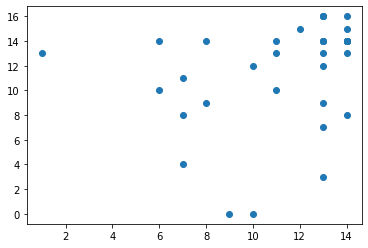

In [46]:
plt.scatter(df_adh['acti_adh'].values, df_adh['meal_adh'].values)

In [47]:
df_adh['meal_adh'].describe()

count    36.000000
mean     11.583333
std       4.292019
min       0.000000
25%       9.750000
50%      13.500000
75%      14.000000
max      16.000000
Name: meal_adh, dtype: float64

In [48]:
df_adh['acti_adh'].describe()

count    36.000000
mean     11.305556
std       3.178674
min       1.000000
25%       9.750000
50%      13.000000
75%      14.000000
max      14.000000
Name: acti_adh, dtype: float64

In [49]:
df_adh['cgm_adh'].describe()

count    36.000000
mean     12.611111
std       1.293451
min       7.000000
25%      13.000000
50%      13.000000
75%      13.000000
max      13.000000
Name: cgm_adh, dtype: float64

In [50]:
df_adh

,uid,adherence atleast 1 meal,adherence atleast 2 meal,adherence atleast 3 meal,n_days_cgm,n_days_acti,meal_adh,cgm_adh,acti_adh,all_adh
0,1,13,13,11,14,14,13,12,14,12
1,2,15,14,13,15,15,14,13,14,13
2,3,15,14,13,14,15,14,13,14,13
3,4,15,14,11,15,15,14,13,14,13
4,5,15,15,14,15,15,15,13,14,13
5,6,16,16,14,15,15,16,13,14,13
6,7,14,14,6,15,15,14,13,13,13
7,8,4,3,3,15,15,3,13,13,2
8,9,11,10,9,15,15,10,13,11,6
9,10,16,16,14,15,15,16,13,13,13
